## Evaluating mBERT Model


In [1]:
!git clone https://github.com/katjakon/GurkLM.git -b dev2

Cloning into 'GurkLM'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 196 (delta 95), reused 172 (delta 79), pack-reused 0 (from 0)
Receiving objects: 100% (196/196), 349.83 KiB | 505.00 KiB/s, done.
Resolving deltas: 100% (95/95), done.


In [10]:
!pip install datasets conllu

In [3]:
import sys
sys.path.insert(0,'/content/GurkLM')

In [33]:
import os
import torch
from transformers import AutoModelForMaskedLM, AutoModel
from transformers import XLMRobertaTokenizerFast, BertTokenizerFast

from evaluate import save_metrics
from gurk.classifier import UpperBoundClassifier, train_model
from gurk.ud_data import get_ud_data, get_code_mapping, get_pos_mapping


In [25]:
model_type = "FacebookAI/xlm-roberta-large"
result_dir = "result_upper"
ud_ds = "qtd_sagt"
batch_size = 16
n_epochs = 10
lr = 0.001


In [23]:
res_path = os.path.join("GurkLM", result_dir)
if not os.path.exists(res_path):
  os.mkdir(res_path)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [35]:
tokenizer = XLMRobertaTokenizerFast.from_pretrained(model_type)
model = AutoModel.from_pretrained(model_type)

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

In [36]:
train_dl, val_dl, test_dl = get_ud_data(
  ud_ds,
  batch_size=batch_size,
  tokenizer=tokenizer,
  label_type="upos")


Map:   0%|          | 0/285 [00:00<?, ? examples/s]

Map:   0%|          | 0/801 [00:00<?, ? examples/s]

Map:   0%|          | 0/805 [00:00<?, ? examples/s]

In [37]:
pos_classes = get_pos_mapping(train_dl.dataset)

In [38]:
dim = model.config.hidden_size
num_classes = len(pos_classes)

clf_nn = UpperBoundClassifier(num_classes, model, dim=dim)

# Train model.
logs = train_model(
clf_nn,
train_dl,
val_dl,
lr=lr,
n_epochs=n_epochs,
pad_token_id=tokenizer.pad_token_id
)



Validating...: 100%|██████████| 51/51 [00:15<00:00,  3.37it/s]


Train Loss: 44.02175283432007	 Train Accuracy 0.20173805090006208
Val Loss: 142.24092817306519	 Val Accuracy 0.014066301703163017


Validating...: 100%|██████████| 51/51 [00:15<00:00,  3.35it/s]


Train Loss: 42.84183621406555	 Train Accuracy 0.19822056693565074
Val Loss: 161.62161445617676	 Val Accuracy 0.021289537712895375


Validating...: 100%|██████████| 51/51 [00:15<00:00,  3.37it/s]


Train Loss: 42.63973259925842	 Train Accuracy 0.21994620318642666
Val Loss: 144.1878764629364	 Val Accuracy 0.01817214111922141


Validating...: 100%|██████████| 51/51 [00:15<00:00,  3.37it/s]


Train Loss: 42.009241819381714	 Train Accuracy 0.21725636250775915
Val Loss: 142.38638353347778	 Val Accuracy 0.014066301703163017


Validating...: 100%|██████████| 51/51 [00:14<00:00,  3.45it/s]


Train Loss: 41.733664989471436	 Train Accuracy 0.21746327332919513
Val Loss: 144.74462366104126	 Val Accuracy 0.016271289537712896


Validating...: 100%|██████████| 51/51 [00:15<00:00,  3.37it/s]


Train Loss: 41.51867938041687	 Train Accuracy 0.22636043865094144
Val Loss: 143.5450954437256	 Val Accuracy 0.014066301703163017


Validating...: 100%|██████████| 51/51 [00:15<00:00,  3.36it/s]


Train Loss: 41.24401354789734	 Train Accuracy 0.23111938754396855
Val Loss: 143.3973560333252	 Val Accuracy 0.014066301703163017


Validating...: 100%|██████████| 51/51 [00:15<00:00,  3.36it/s]


Train Loss: 41.05630135536194	 Train Accuracy 0.23442996068694394
Val Loss: 142.5707767009735	 Val Accuracy 0.014978710462287105


Validating...: 100%|██████████| 51/51 [00:15<00:00,  3.38it/s]


Train Loss: 40.89155912399292	 Train Accuracy 0.2377405338299193
Val Loss: 141.51646089553833	 Val Accuracy 0.015282846715328468


Validating...: 100%|██████████| 51/51 [00:14<00:00,  3.44it/s]

Train Loss: 40.72674250602722	 Train Accuracy 0.24394785847299813
Val Loss: 140.90046429634094	 Val Accuracy 0.01551094890510949


Predicting..: 100%|██████████| 51/51 [00:02<00:00, 19.39it/s]


['NOUN',
 'PRON',
 'NOUN',
 'PRON',
 'PRON',
 'VERB',
 'PRON',
 'NOUN',
 'NOUN',
 'ADV',
 'ADV',
 'PRON',
 'PUNCT',
 'PRON',
 'PUNCT',
 'NOUN',
 'PRON',
 'PRON',
 'NOUN',
 'VERB',
 'NOUN',
 'NOUN',
 'PUNCT',
 'NOUN',
 'PRON',
 'PRON',
 'VERB',
 'PRON',
 'PRON',
 'ADV',
 'NOUN',
 'VERB',
 'PRON',
 'NOUN',
 'VERB',
 'NOUN',
 'ADV',
 'PRON',
 'PUNCT',
 'NOUN',
 'PRON',
 'PRON',
 'PRON',
 'PRON',
 'ADV',
 'PRON',
 'PRON',
 'PRON',
 'PRON',
 'ADV',
 'PRON',
 'NOUN',
 'PRON',
 'ADV',
 'ADV',
 'PRON',
 'PRON',
 'ADV',
 'ADV',
 'PRON',
 'ADV',
 'PRON',
 'PRON',
 'ADV',
 'PRON',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'VERB',
 'ADV',
 'ADV',
 'NOUN',
 'NOUN',
 'ADV',
 'ADV',
 'PRON',
 'ADV',
 'VERB',
 'VERB',
 'PRON',
 'PRON',
 'PUNCT',
 'NOUN',
 'PRON',
 'PRON',
 'PRON',
 'ADV',
 'ADV',
 'ADV',
 'ADV',
 'PRON',
 'PUNCT',
 'NOUN',
 'PRON',
 'ADV',
 'ADV',
 'PRON',
 'PRON',
 'NOUN',
 'NOUN',
 'NOUN',
 'PRON',
 'NOUN',
 'PUNCT',
 'NOUN',
 'PRON',
 'PRON',
 'ADV',
 'PRON',
 'PRON',
 'PRON',
 'ADV',
 

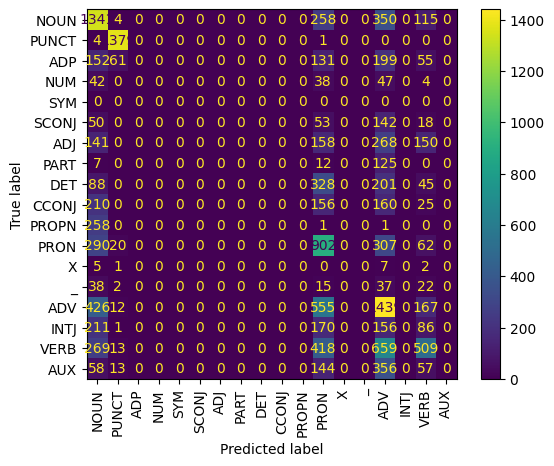

In [21]:
save_metrics(
    pos_classes,
    test_dl,
    clf_nn,
    task="upos",
    output=res_path,
    pad_token_id=tokenizer.pad_token_id
)